In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**BITCOIN**

#### Find formula


In [21]:
df = pd.read_csv('Bitcoin Historical Data.csv', header=0, delimiter=',')

# Chuyển đổi cột ngày thành định dạng datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Chuyển đổi cột ngày trở lại thành chuỗi với định dạng "%m/%d/%Y"
# Visualize the data


df['Date'] = df['Date'].dt.strftime('%m/%d/%Y')
df['Date'] = pd.to_datetime(df['Date']).astype('int64') // 10**9

for col in ['Price', 'Open', 'High', 'Low']:
    df[col] = df[col].str.replace(',', '').astype(float)

print(df)
x = np.array(df["Date"])
y = np.array(df["Price"])

df.info()

            Date    Price     Open     High      Low    Vol. Change %
0     1717200000  67760.8  67533.9  67861.0  67449.6  19.01K    0.34%
1     1717113600  67530.1  68352.3  69018.2  66676.8  61.51K   -1.21%
2     1717027200  68354.7  67631.3  69504.7  67138.4  66.84K    1.06%
3     1716940800  67635.8  68366.2  68897.6  67143.2  52.13K   -1.07%
4     1716854400  68366.0  69428.3  69560.7  67299.9  71.39K   -1.53%
...          ...      ...      ...      ...      ...     ...      ...
4106  1362441600     40.3     36.2     40.7     36.2  85.43K   11.56%
4107  1362355200     36.2     34.5     36.7     34.2  46.77K    4.78%
4108  1362268800     34.5     34.3     34.5     33.8  12.53K    0.73%
4109  1362182400     34.3     34.5     34.8     33.2  36.66K   -0.72%
4110  1362096000     34.5     33.4     34.9     32.9  39.79K    3.36%

[4111 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111 entries, 0 to 4110
Data columns (total 7 columns):
 #   Column    Non-Null Count

In [22]:
print(type(y))
print(type(x))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [23]:
def gauss_newton(X, y, B0, tol=1e-6, max_iter=1000):
  J = np.zeros((len(X), len(B0)))
  n_iter = 0
  while True:
    n_iter += 1
    rC1 = -(X / (B0[1] + X))
    rC2 = (B0[0] * X / (B0[1] + X) ** 2)

    J[:, 0] = rC1
    J[:, 1] = rC2

    # Compute SSE
    SSE = y - ((B0[0] * X) / (B0[1] + X))

    # Compute inverse of (J^T * J)
    t1 = np.linalg.inv(np.dot(J.T, J))

    # Compute t1 * J^T
    t2 = np.dot(t1, J.T)

    # Compute t2 * SSE
    t3 = np.dot(t2, SSE)

    # Update parameters
    B1 = B0 - t3

    # Check for convergence
    if np.max(np.abs(B1 - B0)) <= tol:
      break

    # Update parameters for next iteration
    B0 = B1

    # Check for maximum iterations
    if n_iter >= max_iter:
      break
    return B0, n_iter

In [24]:
#1. Khởi tạo giá trị ban đầu
initial_guess = np.array([1.0, 1.0])
#2. Khởi tạo ma trận Jacobian
J = np.zeros((len(x),len(initial_guess)))
#3. Khởi tạo giá trị Iter
i = 0
x, y

B_opt, n_iter = gauss_newton(x, y, initial_guess)
C1, C2 = B_opt
print(f'Constant C1 = {C1:.4f}, Constant C2 = {C2:.4f}, Number of iterations = {n_iter}')

Constant C1 = 219986.3230, Constant C2 = 315343758584224.6250, Number of iterations = 1


#### Visualization


Text(0.5, 1.0, 'Gauss NewTon with Bitcoin Stock Time Series Forecast')

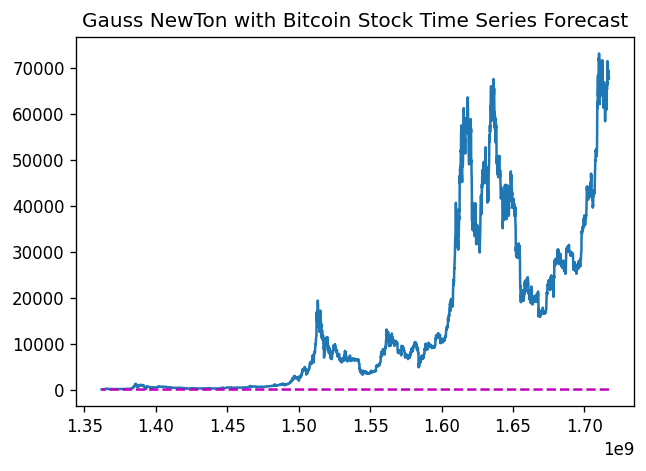

In [25]:
pred = (C1*x)/(C2+x)
plt.figure(1, figsize=(6,4), dpi=120)
plt.plot(x, y)
plt.plot(x,pred, "--m", label='Predict')
plt.title('Gauss NewTon with Bitcoin Stock Time Series Forecast')

## NASDAQ

In [26]:
df = pd.read_csv('NASDAQ Composite Historical Data.csv', header=0, delimiter=',')

# Chuyển đổi cột ngày thành định dạng datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Chuyển đổi cột ngày trở lại thành chuỗi với định dạng "%m/%d/%Y"
# Visualize the data


df['Date'] = df['Date'].dt.strftime('%m/%d/%Y')
df['Date'] = pd.to_datetime(df['Date']).astype('int64') // 10**9

for col in ['Price', 'Open', 'High', 'Low']:
    df[col] = df[col].str.replace(',', '').astype(float)

print(df)
x = np.array(df["Date"])
y = np.array(df["Price"])

df.info()

            Date     Price      Open      High       Low     Vol. Change %
0     1717113600  16735.02  16771.90  16789.27  16445.54    1.81B   -0.01%
1     1717027200  16737.08  16878.63  16900.46  16690.36    1.11B   -1.08%
2     1716940800  16920.58  16879.35  16989.60  16873.97    1.15B   -0.58%
3     1716854400  17019.88  16988.31  17032.65  16917.51    1.10B    0.59%
4     1716508800  16920.79  16786.79  16947.79  16771.58  953.61M    1.10%
...          ...       ...       ...       ...       ...      ...      ...
2828  1362614400   3232.09   3224.50   3235.10   3221.47  365.78M    0.30%
2829  1362528000   3222.37   3233.31   3233.44   3217.67  377.54M   -0.05%
2830  1362441600   3224.13   3200.38   3227.31   3200.27  418.69M    1.32%
2831  1362355200   3182.03   3159.46   3182.27   3154.79  397.77M    0.39%
2832  1362096000   3169.74   3143.54   3171.50   3129.40  431.39M    0.30%

[2833 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2833 entries, 0 to 2832
D

In [27]:
print(type(y))
print(type(x))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [28]:
def gauss_newton(X, y, B0, tol=1e-6, max_iter=1000):
  J = np.zeros((len(X), len(B0)))
  n_iter = 0
  while True:
    n_iter += 1
    rC1 = -(X / (B0[1] + X))
    rC2 = (B0[0] * X / (B0[1] + X) ** 2)

    J[:, 0] = rC1
    J[:, 1] = rC2

    # Compute SSE
    SSE = y - ((B0[0] * X) / (B0[1] + X))

    # Compute inverse of (J^T * J)
    t1 = np.linalg.inv(np.dot(J.T, J))

    # Compute t1 * J^T
    t2 = np.dot(t1, J.T)

    # Compute t2 * SSE
    t3 = np.dot(t2, SSE)

    # Update parameters
    B1 = B0 - t3

    # Check for convergence
    if np.max(np.abs(B1 - B0)) <= tol:
      break

    # Update parameters for next iteration
    B0 = B1

    # Check for maximum iterations
    if n_iter >= max_iter:
      break
    return B0, n_iter

In [29]:
#1. Khởi tạo giá trị ban đầu
initial_guess = np.array([1.0, 1.0])
#2. Khởi tạo ma trận Jacobian
J = np.zeros((len(x),len(initial_guess)))
#3. Khởi tạo giá trị Iter
i = 0
x, y

B_opt, n_iter = gauss_newton(x, y, initial_guess)
C1, C2 = B_opt
print(f'Constant C1 = {C1:.4f}, Constant C2 = {C2:.4f}, Number of iterations = {n_iter}')

Constant C1 = 62336.9116, Constant C2 = 82563277782801.7812, Number of iterations = 1


#### Visualization


Text(0.5, 1.0, 'Gauss NewTon with NASDAQ Composite Stock Time Series Forecast')

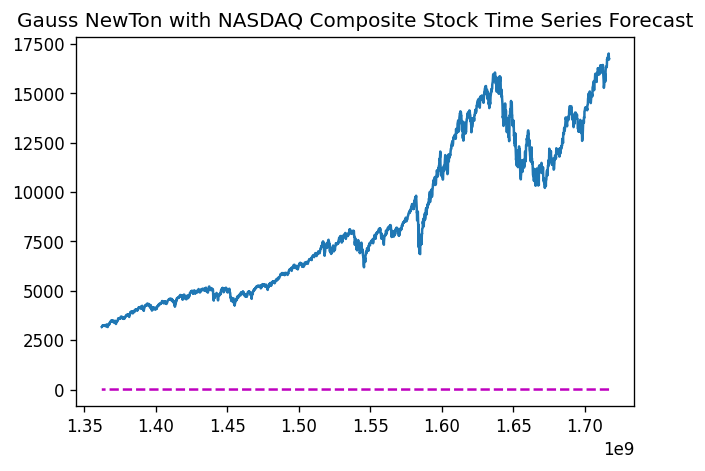

In [30]:
pred = (C1*x)/(C2+x)
plt.figure(1, figsize=(6,4), dpi=120)
plt.plot(x, y)
plt.plot(x,pred, "--m", label='Predict')
plt.title('Gauss NewTon with NASDAQ Composite Stock Time Series Forecast')

## US Dollar

In [31]:
df = pd.read_csv('US Dollar Index Futures Historical Data.csv', header=0, delimiter=',')

# Chuyển đổi cột ngày thành định dạng datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Chuyển đổi cột ngày trở lại thành chuỗi với định dạng "%m/%d/%Y"
# Visualize the data


df['Date'] = df['Date'].dt.strftime('%m/%d/%Y')
df['Date'] = pd.to_datetime(df['Date']).astype('int64') // 10**9


print(df)
x = np.array(df["Date"])
y = np.array(df["Price"])

df.info()

            Date    Price     Open     High      Low    Vol. Change %
0     1717113600  104.627  104.730  104.850  104.310  13.90K   -0.03%
1     1717027200  104.658  105.095  105.135  104.575  17.83K   -0.36%
2     1716940800  105.034  104.590  105.085  104.515  17.66K    0.47%
3     1716854400  104.539  104.490  104.560  104.260  11.02K   -0.09%
4     1716768000  104.638  104.645  104.670  104.485   3.09K    0.00%
...          ...      ...      ...      ...      ...     ...      ...
2902  1362614400   82.123   82.615   82.620   81.995  35.17K   -0.47%
2903  1362528000   82.507   82.020   82.640   81.975  26.04K    0.44%
2904  1362441600   82.147   82.210   82.300   81.955  25.02K   -0.13%
2905  1362355200   82.255   82.355   82.530   82.230  19.76K   -0.13%
2906  1362096000   82.358   82.010   82.580   81.850  34.83K    0.43%

[2907 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907 entries, 0 to 2906
Data columns (total 7 columns):
 #   Column    Non-Null Count

In [32]:
print(type(y))
print(type(x))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [33]:
def gauss_newton(X, y, B0, tol=1e-6, max_iter=1000):
  J = np.zeros((len(X), len(B0)))
  n_iter = 0
  while True:
    n_iter += 1
    rC1 = -(X / (B0[1] + X))
    rC2 = (B0[0] * X / (B0[1] + X) ** 2)

    J[:, 0] = rC1
    J[:, 1] = rC2

    # Compute SSE
    SSE = y - ((B0[0] * X) / (B0[1] + X))

    # Compute inverse of (J^T * J)
    t1 = np.linalg.inv(np.dot(J.T, J))

    # Compute t1 * J^T
    t2 = np.dot(t1, J.T)

    # Compute t2 * SSE
    t3 = np.dot(t2, SSE)

    # Update parameters
    B1 = B0 - t3

    # Check for convergence
    if np.max(np.abs(B1 - B0)) <= tol:
      break

    # Update parameters for next iteration
    B0 = B1

    # Check for maximum iterations
    if n_iter >= max_iter:
      break
    return B0, n_iter

In [34]:
#1. Khởi tạo giá trị ban đầu
initial_guess = np.array([1.0, 1.0])
#2. Khởi tạo ma trận Jacobian
J = np.zeros((len(x),len(initial_guess)))
#3. Khởi tạo giá trị Iter
i = 0
x, y

B_opt, n_iter = gauss_newton(x, y, initial_guess)
C1, C2 = B_opt
print(f'Constant C1 = {C1:.4f}, Constant C2 = {C2:.4f}, Number of iterations = {n_iter}')

Constant C1 = 173.3918, Constant C2 = 120165789058.9494, Number of iterations = 1


#### Visualization


Text(0.5, 1.0, 'Gauss NewTon with USD Stock Time Series Forecast')

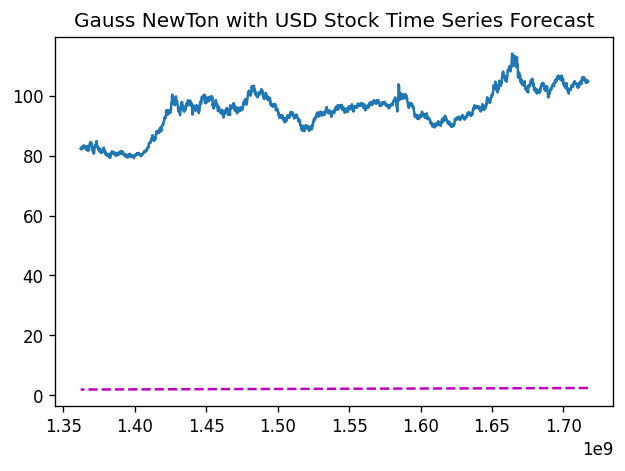

In [35]:
pred = (C1*x)/(C2+x)
plt.figure(1, figsize=(6,4), dpi=120)
plt.plot(x, y)
plt.plot(x,pred, "--m", label='Predict')
plt.title('Gauss NewTon with USD Stock Time Series Forecast')